In [1]:
import zipfile

with zipfile.ZipFile('./../data/earth_day_missions.csv.zip', 'r') as myzip:
    myzip.extract('earth_day_missions.csv', './../data/')
    myzip.close()

In [2]:
import pandas as pd

df = pd.read_csv('./../data/earth_day_missions.csv', index_col=0, low_memory=False)
df['outcome'] = df.apply(lambda x: 'SATISFIED' if x['satisfied'] else 'IGNORED' if x['ignored'] else 'FAILED', axis=1)
df = df[['start_date', 'user', 'missionId', 'missionType', 'missionSubType', 'period', 'target', 'title', 'outcome']]

df['start_date'] = pd.to_datetime(df['start_date'])
df['user'] = df['user'].astype('category')
df['missionId'] = df['missionId'].astype('category')
df['missionType'] = df['missionType'].astype('category')
df['missionSubType'] = df['missionSubType'].astype('category')
df['period'] = df['period'].astype('category')
df['outcome'] = df['outcome'].astype('category')

df = df.sort_values(by='start_date', ignore_index=True)

df

,start_date,user,missionId,missionType,missionSubType,period,target,title,outcome
0,2024-03-25,628785f1-891b-4f31-96f2-da919a4c3000,8475bffe-7a8c-4991-9da8-dc5c884cbd16,LEARN,JOURNEY,CUSTOM,1,complete_journey,IGNORED
1,2024-03-25,0e1fbd54-1917-40a1-b376-e8e2fe5f60cd,71082500-aa13-43aa-8ce9-5a036735174e,MEASURE,TYPEFORM_BASE,CUSTOM,1,calculate_carbon_footprint,IGNORED
2,2024-03-25,2fe55eb4-674a-44c1-a1dd-68f526a841ae,139090e4-91c0-4107-87bb-c4299c2313fe,LEARN,DAILYEPISODE,WEEKLY,2,watch_the_daily_episode_2,IGNORED
3,2024-03-25,0e1fbd54-1917-40a1-b376-e8e2fe5f60cd,3a563713-2bf9-40b4-ab32-6086c9d83b86,ACT,MOBILITY,WEEKLY,2,log_2_action_mobility,IGNORED
4,2024-03-25,0e1fbd54-1917-40a1-b376-e8e2fe5f60cd,139090e4-91c0-4107-87bb-c4299c2313fe,LEARN,DAILYEPISODE,WEEKLY,2,watch_the_daily_episode_2,IGNORED
...,...,...,...,...,...,...,...,...,...
267891,2024-04-20,cca2fe05-8857-4543-8c11-db53a75f886c,9da99b95-2bb7-4aaa-99c0-5eb56804043c,CHECKIN,CHECKIN,DAILY,1,do_checkin,SATISFIED
267892,2024-04-20,385b605b-3da9-416a-b05b-215e40f4e5e2,a0385ff7-e823-4913-9721-bd27658a7853,CHECKIN,CHECKIN,DAILY,1,do_checkin,SATISFIED
267893,2024-04-20,66fb9fb9-f7f6-42ae-b492-06c81e25eb65,9f25461a-6f50-477a-a70a-1c333d37fb0c,CHECKIN,CHECKIN,DAILY,1,do_checkin,SATISFIED
267894,2024-04-20,66fb9fb9-f7f6-42ae-b492-06c81e25eb65,7787bc9a-b241-4054-9bd2-1f6b369de544,CHECKIN,CHECKIN,DAILY,1,do_checkin,SATISFIED


In [22]:
summary = df.groupby(['missionId', 'title', 'missionType', 'missionSubType', 'period', 'target', 'outcome'], observed=True).size().unstack(fill_value=0)
summary.sort_index(level=[2, 3, 4, 5], inplace=True)

summary

,,,,,outcome,FAILED,IGNORED,SATISFIED
missionId,title,missionType,missionSubType,period,target,,,
3d3aaf18-b932-4aa1-8251-147eed0799b7,log_1_action,ACT,ALL,DAILY,1,0,0,636
a50cf653-3b65-4c6b-81e4-b081c07d9174,log_2_action,ACT,ALL,DAILY,2,113,0,1087
918ea43d-fd99-4bab-8ef4-8a3c5d5ebb9a,log_3_action,ACT,ALL,DAILY,3,115,0,517
df682936-0e00-4ec1-91f2-e59baf6d5884,log_2_action2_consecutive,ACT,ALL,WEEKLY,2,1425,21618,190
ad898e81-9b4e-4e43-9d1f-cb42d82d790e,log_1_action_energy,ACT,ENERGY,DAILY,1,0,0,101
9e9353e1-5ecd-4665-8911-eb09c694381f,log_2_action_energy,ACT,ENERGY,DAILY,2,48,0,814
b0575577-8a92-4487-bb27-4a96642f4da4,log_1_action_environment,ACT,ENVIRONMENT,DAILY,1,0,0,554
58e24f59-ae8b-4d54-8826-8d869585a880,log_1_action_vegetarian,ACT,FIXED,DAILY,1,0,0,98
d73c4747-e06b-498f-b827-ec52996e4b99,log_action_take5minutesshower,ACT,FIXED,DAILY,1,0,0,101


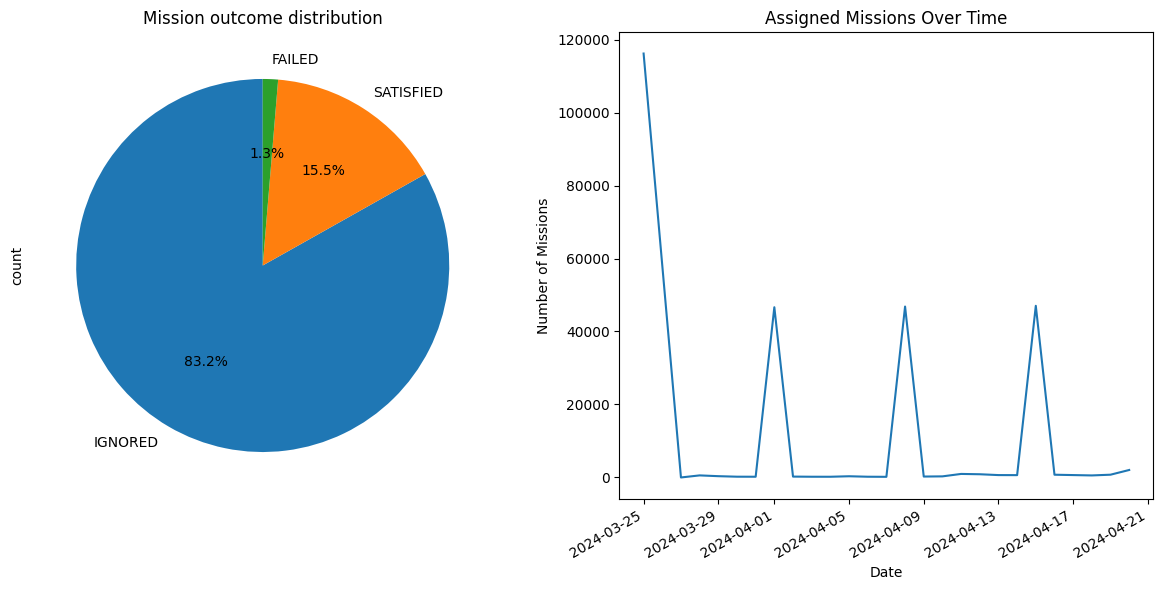

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df['outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[0])
axs[0].set_title('Mission outcome distribution')

df.groupby('start_date').size().plot(ax=axs[1])
axs[1].set_title('Assigned Missions Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Missions')

plt.tight_layout()